In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
from datetime import timedelta

In [3]:
import_directory = 'C:\\Users\\Emma Hegermiller\\Git\\price-prediction\\data'

df_import =pd.read_csv(import_directory + '\\sample.csv')

C:\Users\Emma Hegermiller\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_import.head()

,index_pandas,vin,days_on_market,listing_date_begin,listing_date_end,year,make,model,trim,body_style,...,msrp,is_cpo,seller_city,seller_state,seller_type,seller_is_franchise_dealer,seller_is_online_only,seller_ships_nationwide,list_price,shift_buyer_region
0,0,19XFC1F30LE007261,12,2021-02-10,2021-02-22,2020,Honda,Civic,EX Sedan FWD,Sedan,...,NaN,NaN,"Davie, FL",FL,DEALER,True,NaN,NaN,20833.0,NaN
1,1,19XFC1F30LE007261,11,2021-02-10,2021-02-21,2020,Honda,Civic,EX Sedan FWD,Sedan,...,NaN,NaN,"Davie, FL",FL,DEALER,True,NaN,NaN,20833.0,NaN
2,2,19XFC1F30LE019698,14,2021-03-25,2021-04-08,2020,Honda,Civic,EX Sedan FWD,Sedan,...,23998.0,NaN,"Suffolk, VA",VA,DEALER,True,NaN,NaN,23998.0,NaN
3,3,19XFC1F30LE019698,13,2021-03-25,2021-04-07,2020,Honda,Civic,EX Sedan FWD,Sedan,...,23998.0,NaN,"Suffolk, VA",VA,DEALER,True,NaN,NaN,23998.0,NaN
4,4,19XFC1F31LE007317,10,2021-04-12,2021-04-22,2020,Honda,Civic,EX Sedan FWD,Sedan,...,NaN,True,"Albuquerque, NM",NM,DEALER,True,NaN,NaN,23333.0,NaN


In [5]:
df_import.columns

Index(['index_pandas', 'vin', 'days_on_market', 'listing_date_begin',
       'listing_date_end', 'year', 'make', 'model', 'trim', 'body_style',
       'transmission', 'mileage', 'accident_count', 'fuel_economy_city',
       'fuel_economy_highway', 'exterior_color', 'msrp', 'is_cpo',
       'seller_city', 'seller_state', 'seller_type',
       'seller_is_franchise_dealer', 'seller_is_online_only',
       'seller_ships_nationwide', 'list_price', 'shift_buyer_region'],
      dtype='object')

In [6]:
df_import.dtypes

index_pandas                    int64
vin                            object
days_on_market                  int64
listing_date_begin             object
listing_date_end               object
year                            int64
make                           object
model                          object
trim                           object
body_style                     object
transmission                   object
mileage                       float64
accident_count                float64
fuel_economy_city             float64
fuel_economy_highway          float64
exterior_color                 object
msrp                          float64
is_cpo                         object
seller_city                    object
seller_state                   object
seller_type                    object
seller_is_franchise_dealer     object
seller_is_online_only          object
seller_ships_nationwide        object
list_price                    float64
shift_buyer_region             object
dtype: objec

In [7]:
# Missingness
row_total = len(df_import)
df_import.isna().sum()/row_total

index_pandas                  0.000000
vin                           0.032520
days_on_market                0.000000
listing_date_begin            0.000000
listing_date_end              0.000000
year                          0.000000
make                          0.000000
model                         0.000000
trim                          0.043196
body_style                    0.001675
transmission                  0.031522
mileage                       0.040290
accident_count                0.023486
fuel_economy_city             0.138341
fuel_economy_highway          0.138341
exterior_color                0.045784
msrp                          0.503128
is_cpo                        0.832309
seller_city                   0.000000
seller_state                  0.000000
seller_type                   0.000000
seller_is_franchise_dealer    0.271658
seller_is_online_only         0.876862
seller_ships_nationwide       0.921080
list_price                    0.048497
shift_buyer_region       

In [9]:
# Looking at duplicate vin 
print("Count of unique vin {}".format(len(df_import.vin.unique())))
ids = df_import["vin"]
df_import.drop_duplicates()[ids.isin(ids[ids.duplicated()])].sort_values("vin")

Count of unique vin 294531


,index_pandas,vin,days_on_market,listing_date_begin,listing_date_end,year,make,model,trim,body_style,...,msrp,is_cpo,seller_city,seller_state,seller_type,seller_is_franchise_dealer,seller_is_online_only,seller_ships_nationwide,list_price,shift_buyer_region
8404,8404,19XFC1F30LE000679,28,2021-03-28,2021-04-25,2020,Honda,Civic,EX Sedan FWD,Sedan,...,NaN,True,"North Richland Hills, TX",TX,DEALER,True,NaN,NaN,21795.0,Dallas
8405,8405,19XFC1F30LE000679,27,2021-03-28,2021-04-24,2020,Honda,Civic,EX Sedan FWD,Sedan,...,NaN,True,"North Richland Hills, TX",TX,DEALER,True,NaN,NaN,21795.0,Dallas
4298,4298,19XFC1F30LE001184,13,2021-01-11,2021-01-24,2020,Honda,Civic,EX Sedan FWD,Sedan,...,NaN,True,"Albuquerque, NM",NM,DEALER,True,NaN,NaN,20959.0,NaN
4299,4299,19XFC1F30LE001184,12,2021-01-11,2021-01-23,2020,Honda,Civic,EX Sedan FWD,Sedan,...,NaN,True,"Albuquerque, NM",NM,DEALER,True,NaN,NaN,21505.0,NaN
6629,6629,19XFC1F30LE001699,13,2021-04-17,2021-04-30,2020,Honda,Civic,EX Sedan FWD,Sedan,...,NaN,NaN,"Newport News, VA",VA,DEALER,True,NaN,NaN,21495.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696651,696651,NaN,0,2021-04-20,2021-04-20,2020,Toyota,Corolla,SE FWD,Sedan,...,NaN,NaN,"Valley Stream, NY",NY,DEALER,NaN,NaN,NaN,NaN,NaN
696652,696652,NaN,0,2021-04-19,2021-04-19,2020,BMW,3 Series,330i xDrive Sedan AWD,Sedan,...,NaN,NaN,"Valley Stream, NY",NY,DEALER,NaN,NaN,NaN,26990.0,NaN
696653,696653,NaN,0,2020-11-27,2020-11-27,2020,Toyota,Corolla,LE FWD,Sedan,...,NaN,NaN,"Riverside, CA",CA,DEALER,NaN,NaN,NaN,14950.0,Los Angeles
696654,696654,NaN,48,2020-07-10,2020-08-27,2020,Ford,Transit Chassis,350 HD 9950 GVWR LB Cutaway DRW AWD,Van,...,38625.0,NaN,"South Ozone Park, NY",NY,PRIVATE,NaN,NaN,NaN,35999.0,NaN


count    696656.000000
mean       2020.087838
std           0.283242
min        2020.000000
25%        2020.000000
50%        2020.000000
75%        2020.000000
max        2022.000000
Name: year, dtype: float64


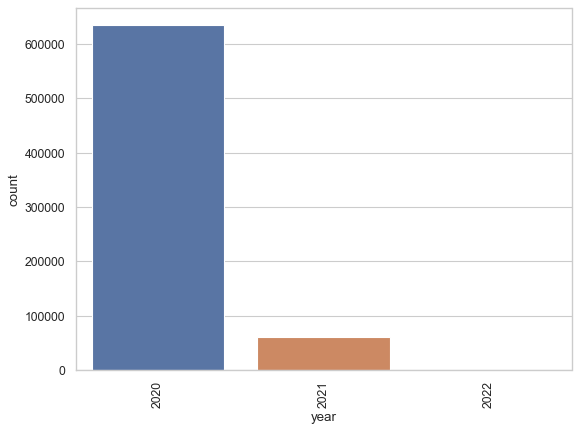

count     696656
unique         5
top       Toyota
freq      280958
Name: make, dtype: object


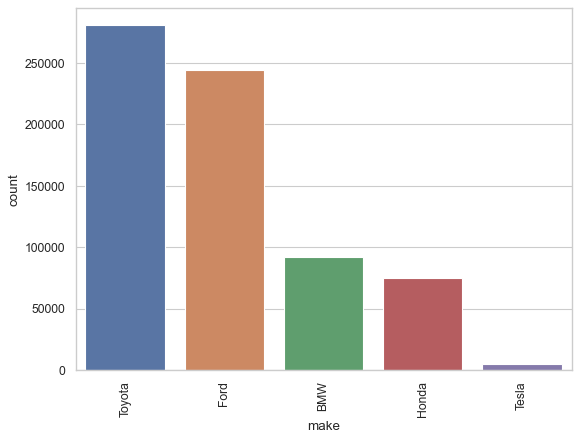

count      696656
unique        103
top       Corolla
freq        74831
Name: model, dtype: object


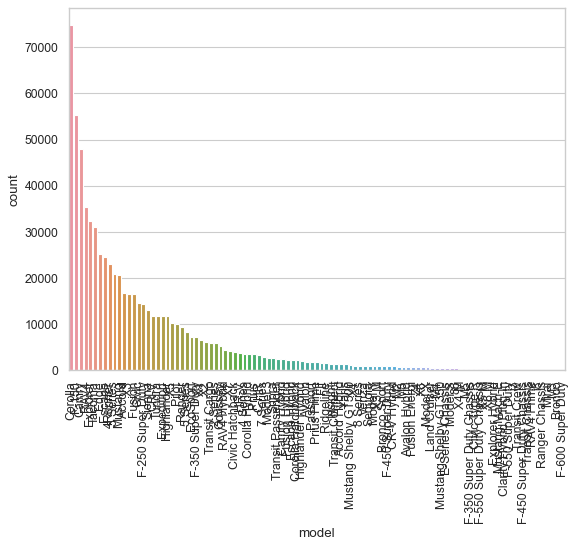

count     666563
unique       556
top       LE FWD
freq       94925
Name: trim, dtype: object


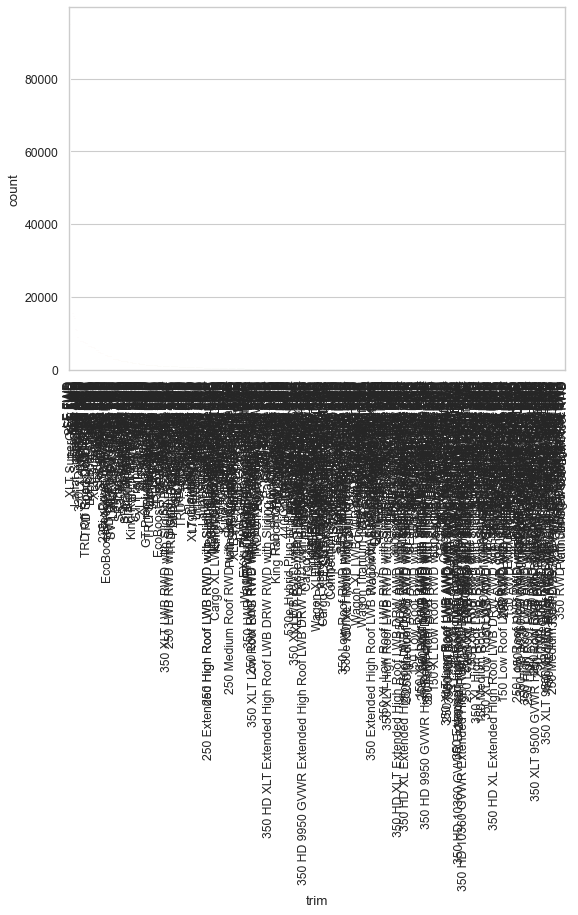

count              695489
unique                  9
top       SUV / Crossover
freq               262751
Name: body_style, dtype: object


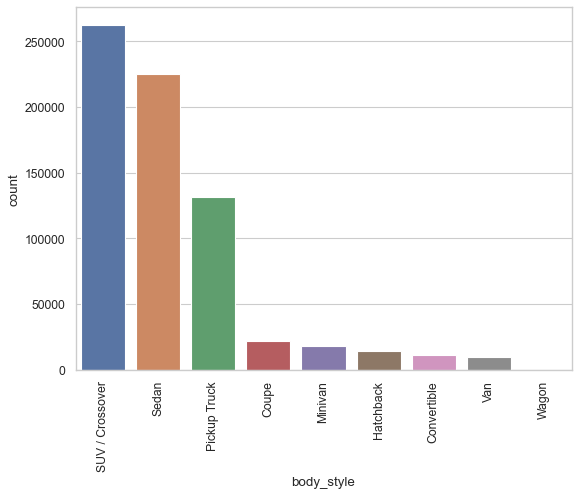

count        674696
unique           30
top       Automatic
freq         385105
Name: transmission, dtype: object


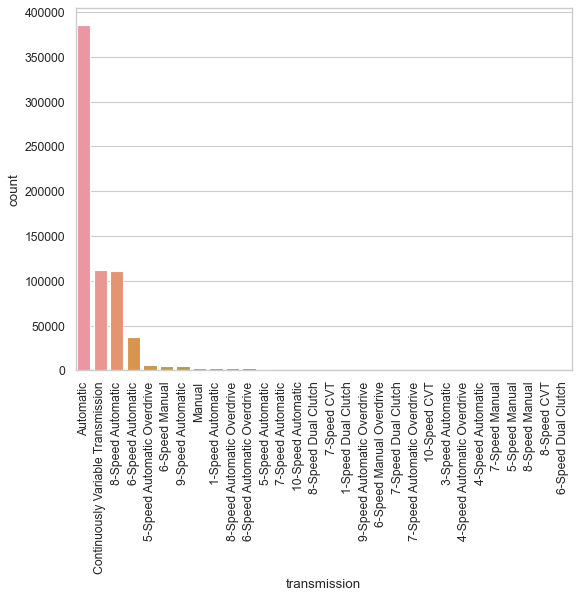

count     664760
unique      3462
top        White
freq       53647
Name: exterior_color, dtype: object


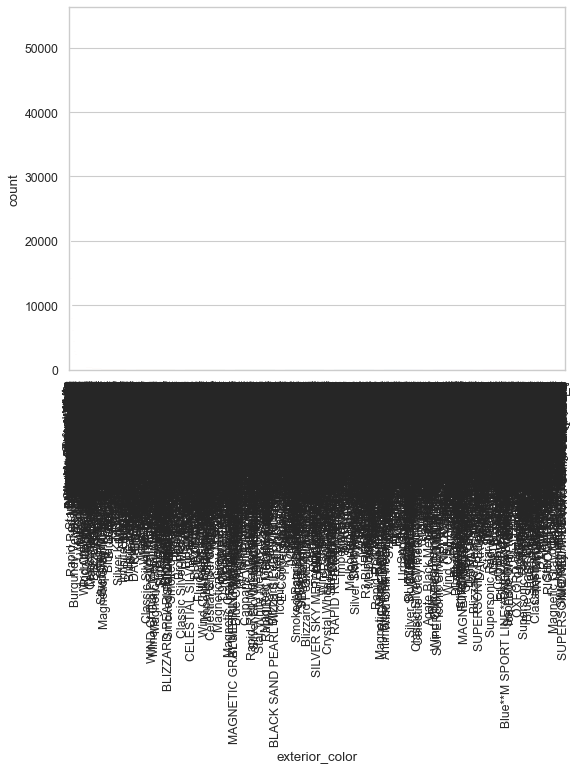

NameError: name 'df_valid' is not defined

In [10]:
# Frequency distribution for categorical variables
categorical_attributes = ["year", "make", "model", "trim", "body_style", "transmission", "exterior_color"]

for att in categorical_attributes:
    print(df_import[att].describe())
    plt.figure(figsize=(8, 6), dpi=80)
    ax = sns.countplot(x=att, data=df_import, order = df_import[att].value_counts().index)
    plt.xticks(rotation = 90)
    plt.show()

text_cols = ["trim", "transmission", "exterior_color"]
for col in text_cols:
    unique_cat = df_import[col].unique()
    other_cat = []
    for cat in unique_cat:
        cat_count = len(df_import[df_import[col]==cat])
        if cat_count <395: # Categor count is less than 0.1%
            other_cat.append(cat)
        else:
            pass
    print(other_cat)
    print(len(other_cat))


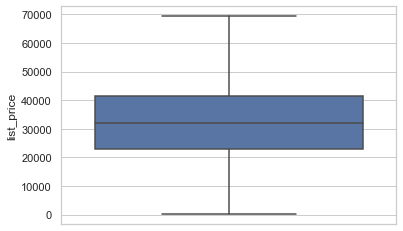

In [12]:
# Price distribution overall
sns.boxplot(y='list_price', data=df_import, showfliers=False)
plt.show()

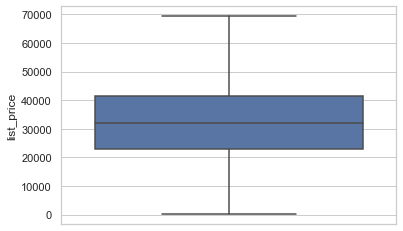

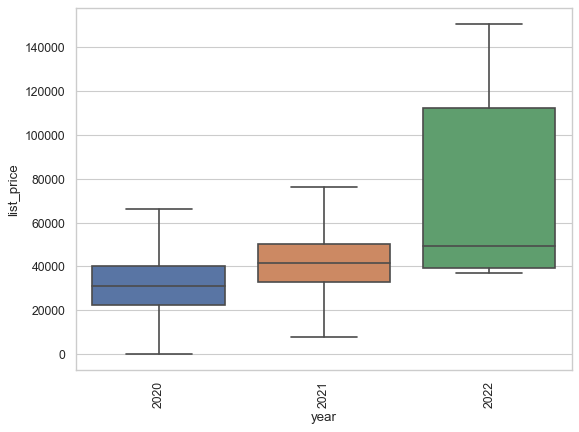

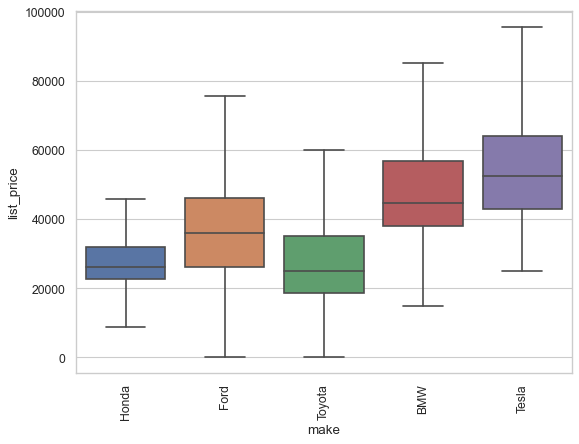

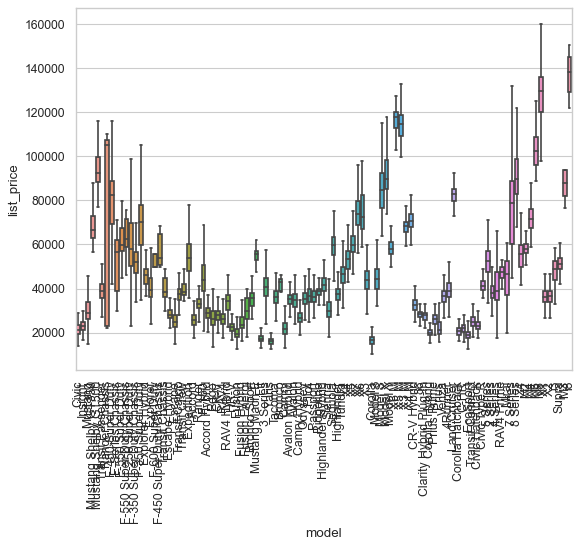

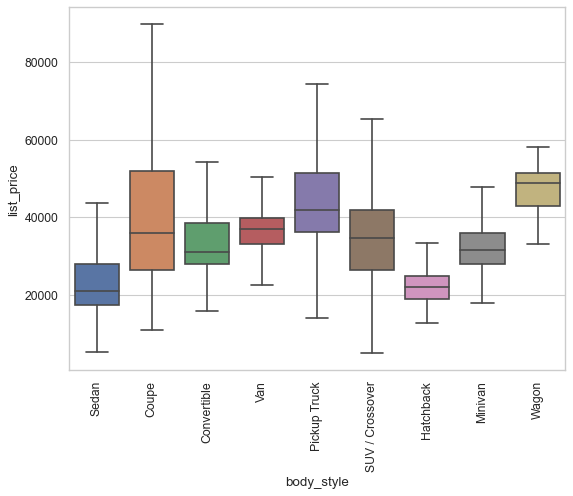

In [16]:
# Price distribution per categorical
sns.boxplot(y='list_price', data=df_import, showfliers=False)
plt.show()

categorical_attributes = ["year", "make", "model", "body_style"]

for att in categorical_attributes:
    plt.figure(figsize=(8, 6), dpi=80)
    ax = sns.boxplot(y = 'list_price', x=att, data=df_import, showfliers=False)
    plt.xticks(rotation = 90)
    plt.show()